STAT 2255: Sample Final Exam
=====================



### Submission requirement (5 pts):



1.  Solve the exam problems using the "stat2255" virtual environment.
2.  You should submit both the jupyter notebook file and the pdf file.
3.  Name your files as "LastName-FirstName.ipynb" and "LastName-FirstName.pdf",
    e.g.,
    -   "Wang-Ben.ipynb"
    -   "Wang-Ben.pdf"



## Problem 1 (20 pts)



We want to generate random numbers from a distribution with the following pdf:

$$f(x) = 4x^{3}, \text{ for }  x\in [0, 1].$$

The cdf is:

$$F(x) = x^{4}, \text{ for }  x\in [0, 1].$$



### part 1.1 - 10 pts



Using the distribution function given above, code its inverse function
$F^{-1}(u)$ and test it with `u` taking values of  `0, 0.25, 0.5,
0.75, 1`.

$$F^{-1}(u)=u^{1/4}$$

#### ans



In [1]:
import numpy as np
def Fi(u):
    return u**(1/4)

[Fi(x) for x in [0, 0.25, 0.5, 0.75, 1]]

[0.0, 0.7071067811865476, 0.8408964152537145, 0.9306048591020996, 1.0]

### part 1.2 - 10 pts



Using the inversion method we covered in the class, and assuming we can
generate $U\sim Uniform(0,1)$ (use `random.uniform()` from `numpy`),
write a function `random_f` that generate a random number from the
given distribution. Set `np.random.seed(2255)` and run your function.

**Note**: Your function should return a float number as output.



#### ans



In [2]:
def random_f():
    u = np.random.uniform()
    return Fi(u)

np.random.seed(2255)
random_f()

0.9735625922331343

## Problem 2 (25 pts)



We want to generate normal random variable using the rejection method and the standard Cauchy distribution.

In this context, since we want to generate random variable from standard
normal distribution, so we have the target density $f$

$$f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}, x\in \mathbb{R}.$$

The instrumental density function $g$ is

$$g(x) = \frac{1}{\pi(1+x^2)}, x\in \mathbb{R}.$$




We want to specify $c$ such that:

$$c = \text{sup}_x \frac{f(x)}{g(x)}=\sqrt{\frac{2\pi}{e}}.$$

### part 2.1 - 10 pts



Using $c=\sqrt{\frac{2\pi}{e}}$, write a function `random_normal()` to implement the
 rejection method to generate a random number from the pdf $f$. Assume we can
 generate $U\sim Uniform(0,1)$ (use `random.uniform()` from `numpy`) and generate
random variable from the standard Cauchy distribution (use
`random.standard_cauchy()` function from `numpy`). Set
 `np.random.seed(2255)` and run your function.

**Note**: Your function needs to return a float number as output.



#### ans



In [3]:
def random_normal(mu=0, sigma=1):
    while True:
        V = np.random.uniform()
        X = np.random.standard_cauchy() 
        if (((2/np.pi/np.e)**0.5) / (1+X**2)) * V <= ((1/((2*np.pi)**0.5))*np.exp(-X**2/2)):
            return sigma * X + mu

np.random.seed(2255)
random_normal()

-1.709289806604053

### part 2.2 - 15 pts



Generate 5000 random numbers using `random.normal()` function from `numpy` and
another 5000 random numbers using the function in part 2.1. Make 2 histograms
overlay with each other to see if they are close (**set the number of bins to be
20**). In addition, generate a two-sample QQ plot using the two data. **Set the random seed as 2255 before generating random numbers**.



#### ans



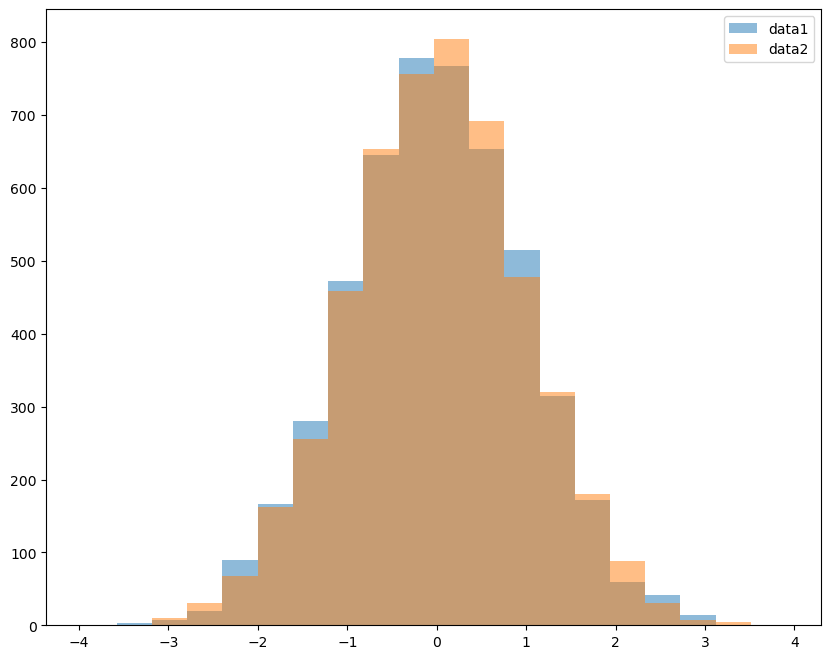

In [4]:
import matplotlib.pyplot as plt
np.random.seed(2255)
dat1 = np.random.normal(size = 5000)
dat2 = [random_normal() for i in range(5000)]
plt.figure(figsize=(10,8))
bins = np.histogram(np.hstack((dat1,dat2)), bins=20)[1]
plt.hist(dat1, alpha=0.5, label="data1", bins = bins)
plt.hist(dat2, alpha=0.5, label="data2", bins = bins)
plt.legend()
plt.show()

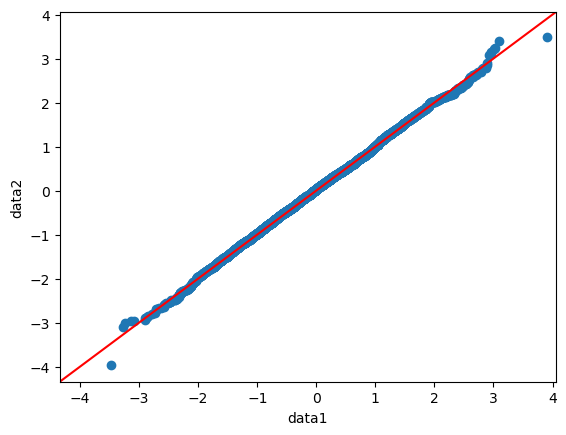

In [5]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(np.array(dat1), np.array(dat2), xlabel="data1", ylabel="data2", line ='45')
plt.show()

## Problem 3 (20 pts)



For each of the following two parts, you need to conduct a hypothesis
test to test the claim. When conducting the test, please use the
following procedures:

1.  Formulate your null and alternative hypothesis.
2.  Decide which test is appropriate.
3.  Check if the assumption for the test you chose is satisfied.
4.  Regardless of the assumptions, calculate the test statistic and the p-value.
5.  Make a decision



### part 3.1 - 10 pts



Many students take a course which is advertised to boost scores on the LSAT. The agency that teaches the course claims the course is an effective way to raise scores on the LSAT. To test this claim, a group of students are given the LSAT and their scores are recorded. They then attend the course for 5 weeks and retake the exam. The data can be found in the file **lsat.csv**. PRESCORE and POSTSCORE show the scores before and after taking the course.

Conduct an appropriate test at the $\alpha = 0.1$ level of
significance.

#### ans



$H_0: \mu_1 = \mu_2$ vs $H_1: \mu_1 < \mu_2$

Use paired t-test because of dependent population.

The sample size is small, so need to test normality, which gives a
p-value of 0.580. We can say the normality assumption is appropriate for the data.

The p-value is 0.047, which is smaller than 0.1. So we reject $H_0$.



In [6]:
import pandas as pd
dat = pd.read_csv('lsat.csv')
d = dat.PRESCORE - dat.POSTSCORE
# small sample size, need to test normality
import scipy.stats as scs
print('The p value of shapiro wilk test is {}'.format(scs.shapiro(d).pvalue.round(4)))
# p-value is large, t-test is fine
t_score, p_value = scs.ttest_1samp(d, popmean=0, alternative='less')
print('The test statistics is {}, and the p value is {}.'.format(t_score.round(4), p_value.round(4)))
# reject $H_0$ because pvalue is smaller than 0.1

The p value of shapiro wilk test is 0.5802
The test statistics is -1.7289, and the p value is 0.0472.


### part 3.2 - 10 pts



The data in file **mathsat.csv** contains SAT math scores of 28 engineering students and 22 business students. Is there a significant difference in the average SAT math score between engineering students and business students?
Conduct an appropriate test to test at $\alpha=0.05$ level of
significance.



#### ans



$H_0: \mu_1 = \mu_2$ vs $H_1: \mu_1 \ne \mu_2$

Use two sample t-test because of dependence assumption is fine.

The sample size is small, so need to test normality, which gives
p-values of 0.659 and 0.148. We can say the normality assumption is appropriate for the data.

The p-value is 0.2, which is larger than 0.05. So we fail to reject $H_0$.

In [7]:
dat = pd.read_csv('mathsat.csv')
# small sample size, need to test normality
print('The p value of shapiro wilk test for Engineering students data is {}'.format(scs.shapiro(dat.Engineering).pvalue.round(4)))
print('The p value of shapiro wilk test for Business students data is {}'.format(scs.shapiro(dat.Business.dropna()).pvalue.round(4)))
# both p-values are large, t-test is fine
import statsmodels.stats.api as sms
t_score, p_value, degree_fr = sms.ttest_ind(dat.Engineering, dat.Business.dropna(), alternative='two-sided',usevar='unequal')
print('The test statistics is {}, and the p value is {}.'.format(t_score.round(4), p_value.round(4)))
# fail to reject $H_0$ because pvalue is larger than 0.05

The p value of shapiro wilk test for Engineering students data is 0.6593
The p value of shapiro wilk test for Business students data is 0.1482
The test statistics is 1.3004, and the p value is 0.2.


## Problem 4 (30 pts)



The file "`Game_of_Thrones_Script.csv`" contains line script for
characters across 8 seasons. Use this file, answer the following
question. You may need to set `keep_default_na=False` when loading the data,
e.g., 

In [8]:
import pandas as pd
pd.read_csv("Game_of_Thrones_Script.csv", keep_default_na=False)

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011/4/17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011/4/17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011/4/17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
23906,2019/5/19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019/5/19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019/5/19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019/5/19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


### part 4.1 - 5 pts



Which episode has the least number of characters?

#### ans



In [9]:
df1 = pd.read_csv("Game_of_Thrones_Script.csv", keep_default_na=False)
ge = df1.groupby('Episode')
ncs = ge['Name'].apply(lambda x: x.nunique())
ncs
ncs.idxmin(), "has", ncs.min(), "characters."

('Episode 9', 'has', 134, 'characters.')

### part 4.2 - 10 pts



Which episode has the most line of sentences in total?

#### ans



In [10]:
ge = df1.groupby('Episode')
n_lines = ge['Sentence'].apply(lambda x: x.count())
n_lines.idxmax()

'Episode 5'

### part 4.3 - 5 pts



For season 3, list the top 5 charaters who had the most sentences and how many sentences they have said.

#### ans



In [11]:
gn = df1[df1['Season'] == 'Season 3'].groupby('Name')
n_lines = gn['Sentence'].apply(lambda x: x.count())
n_lines.nlargest(5)

Name
tyrion lannister      241
jaime lannister       129
daenerys targaryen    117
arya stark            104
robb stark             99
Name: Sentence, dtype: int64

### part 4.4 - 10 pts



Based on the **Sentence** column, create a new column called `num_words`
which gives the total number of words in the sentence.

#### ans



In [12]:
df1['num_words'] = df1['Sentence'].apply(lambda x: len(x.split()))
df1.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,num_words
0,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,25
1,2011/4/17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,21
2,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,5
3,2011/4/17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,5
4,2011/4/17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,7
